# AutoPrice Insights: Regression Analysis and Visualization

### Date: February 07, 2023
### Name: Esl Kim (Elsie)
#### Individual Project for Exploratory Data Analysis and Visualization (COM SCI X 450.2)

The aim of this project is to source a dataset related to a topic of interest and unveil intriguing insights through data visualization, employing various types of graphs using R.<br> Specifically, I seek to explore the correlation between car prices and specifications within the U.S. market 

#### Overview of 2022 U.S Car Market and Technical Specifications of Car

According to [Zippia:"Automative Indust Statistics(2023)"](https://www.zippia.com/advice/automotive-industry-statistics/) and [Statista:"Gasoline-powered vehicles in the United States- statistics & facts"](https://www.statista.com/topics/4580/gasoline-powered-vehicles-in-the-united-states/#:~:text=The%20United%20States'%20gasoline%20station,including%20cars%20and%20light%20trucks.), 
- The total value of the US car and automobile manufacturing market is $104.1 billion in 2023.
- 250 million out of 290.8 million cars are using gasoline/petrol (85.9 % of market) and 96% of the car is automatic.

Technical specifications that relate to the performance and characteristics of a car's engine are:

- <ins>Horsepower (in hp or fps or ft-lb/s)</ins>: Horsepower is a unit of measurement that represents the power output of an engine. It indicates how much work an engine can do over a specific period of time. In the context of cars, horsepower is often used to describe the engine's capability to produce speed and acceleration.
$$
Horsepower = \frac{Torque \times RPM}{5,252}
$$

- <ins>Torque (in ft-lb or lb-ft)</ins>: Torque is a rotational force produced by the engine. It is a measure of the engine's twisting force, which contributes to acceleration and overall performance. Higher torque at lower RPM (revolutions per minute) can result in better acceleration and responsiveness.

- <ins>Displacement (in Liters, L) </ins>: Engine displacement, often measured in liters (L) or cubic centimeters (cc), refers to the total volume of all cylinders in an internal combustion engine. It is an indicator of the engine's size and can influence power and fuel efficiency. Generally, engines with larger displacements tend to have higher power outputs.
$$
Displacement = {Stroke\text{ }Length^{*} \times (\frac{\pi}{4}) \times Bore^{2**}  \times Number\text{ }of\text{ }Cylinders}
$$
###### <center> * Stroke Length: The distance travelled by a piston ** Bore: The circular area of the cylinder</center>
- <ins>Number of Cylinders</ins>: The number of cylinders refers to the quantity of individual combustion chambers within an engine. Common configurations include 4-cylinder, 6-cylinder, and 8-cylinder engines. The number of cylinders can affect factors such as power, smoothness, and efficiency.

These specifications provide insights into the power, efficiency, and overall performance of a vehicle.

#### Required R Packages:

In [2]:
#(install: install.packages("name"))
library(plyr) # Data manipulation
library(tidyverse) # ggplot2, dplyr, tidyr for data visualization and manipulation
library(scales) # scaling ggplot2 including labels, breaks and palettes
library(ggcorrplot) # correlation plot
library(plotrix) # 3D Pie Chart
library(ggrepel) # Pie chart label
library(ggpubr) # Regression line equation
library(viridis)

#### Data Collection and Description

Dataset was obtained from [Kaggle:New Cars USA 2022/23 dataset](https://www.kaggle.com/datasets/tymekurban/new-cars-usa-202223-dataset). Data scraped from ccarprice.com and thoroughly cleaned. Total 2602 rows and 76 columns in the dataset. Each row is one car. There may be some mistakes and NAs, so when manipulating data remember some values in columns may be irrational. All important technical data such as drivetrain, power or torque as well as photo url, body, car dimensions and additional equipment.

#### Data Import (a single csv file: cars_us_2022.csv)

In [3]:
carsus2022 <- read.csv("cars_us_2022.csv")

#### Brief Information and Summary of the Dataset

In [4]:
str(carsus2022)

'data.frame':	2602 obs. of  76 variables:
 $ X                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Brand                            : chr  "Honda" "Honda" "Honda" "Honda" ...
 $ Model.Number                     : chr  "Accord Hybrid Sport-L 2023" "Accord Sedan 2023" "ZR-V 2023" "HR-V VTi-S 2022" ...
 $ Price                            : num  31670 28000 25000 27800 26900 ...
 $ Photo                            : chr  "https://www.ccarprice.com/products/Honda_Accord_Hybrid_Sport-L_2023.jpg" "https://www.ccarprice.com/products/Honda_Accord_Sedan_2023.jpg" "https://www.ccarprice.com/products/Honda_ZRV_2023.jpg" "https://www.ccarprice.com/products/Honda_HR-V_VTi-S_2022.jpg" ...
 $ Engine.Type                      : chr  "2.0L Inline-4 Hybrid" "1.5L Turbo Inline-4 Gas" "2.0L Inline-4" "2.0L Inline-4 Gas" ...
 $ Body.Type                        : chr  "Sedan" "Sedan" "SUV" "SUV" ...
 $ Fuel.Type                        : chr  "Hybrid" "Petrol" "Petrol" "Petrol" ...
 $ Gearbox.Ty

In [5]:
summary(carsus2022)

       X             Brand           Model.Number           Price         
 Min.   :   1.0   Length:2602        Length:2602        Min.   :    1550  
 1st Qu.: 651.2   Class :character   Class :character   1st Qu.:   32375  
 Median :1301.5   Mode  :character   Mode  :character   Median :   49990  
 Mean   :1301.5                                         Mean   :  170155  
 3rd Qu.:1951.8                                         3rd Qu.:   90800  
 Max.   :2602.0                                         Max.   :15000000  
                                                                          
    Photo           Engine.Type         Body.Type          Fuel.Type        
 Length:2602        Length:2602        Length:2602        Length:2602       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
               

In [16]:
# Change From Empty string to NA
carsus2022[carsus2022 == ''] <- NA
# Check NAs
is.na(carsus2022) 

X,Brand,Model.Number,Price,Photo,Engine.Type,Body.Type,Fuel.Type,Gearbox.Type,Power.hp,⋯,CD.Player,DVD.Player,Electric.Adjustable.Seats,Keyless.Entry,Tyre.Pressure.Monitor,Smart.Access.Card.Entry,Xenon.Headlamps,Halogen.Headlamps,Removable.Convertible.Top,Cassette.Player
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


#### Cleaning Dataset

In [6]:
## Remove Boolean Variables from the dataset as there are alot of empty string ("") 
# and not useful variables such as the first column called "X" for indexing or empty string
cars_us2022 <- carsus2022 %>% select(c(2:18), -c(3,5,6)) # 2602 observations of 14 Variables are left
## Remove NA's values from the data set
cars_us2022 <- na.omit(cars_us2022) # 1229 observations of 14 variables are left

In [7]:
## Check the Unique Variables that has types or few number of types in a variable
unique(cars_us2022$Brand) # 42
unique(cars_us2022$Body.Type) # 9: "Sedan",SUV","Hatchback","Coupe","Convertible", "", "Wagon","Truck","Van"
unique(cars_us2022$Fuel.Type) # 4: "Hybrid", "Petrol", "Unknown", "Diesel" 
unique(cars_us2022$Gearbox.Type) # 3: "CVT","Manual","Automatic"
unique(cars_us2022$Cylinders)
unique(cars_us2022$Drivetrain) # 4: "front" "all"   "rear"  ""
unique(cars_us2022$Seats)
unique(cars_us2022$Doors)

[1] "Honda"        "BMW"          "Lexus"        "Hyundai"      "Toyota"      
 [6] "KIA"          "Nissan"       "Audi"         "Chevrolet"    "Ford"        
[11] "Mercedes"     "Porsche"      "Infiniti"     "Jaguar"       "Cadillac"    
[16] "Land Rover"   "Jeep"         "Volkswagen"   "Maserati"     "Subaru"      
[21] "Dodge"        "Mazda"        "Chrysler"     "Aston Martin" "Ferrari"     
[26] "Lamborghini"  "Bugatti"      "Bentley"      "Rolls Royce"  "Mclaren"     
[31] "Lincoln"      "Alfa Romeo"   "Volvo"        "MINI"         "Fiat"        
[36] "Acura"        "Genesis"      "Buick"        "GMC"          "Koenigsegg"  
[41] "Lotus"        "Renault"      "Suzuki"       "Skoda"        "JAC"

[1] "Sedan"       "SUV"         "Hatchback"   "Coupe"       "Convertible"
[6] ""            "Wagon"       "Truck"       "Van"

[1] "Hybrid"  "Petrol"  "Unknown" "Diesel"

[1] "CVT"       "Automatic" "Manual"

[1]  4  6  8 10  3 12 16 54

[1] "front" "all"   "rear"  ""

[1]  5  8  4  2  6  7 12  9  3  1

[1] 4 5 2 3 1

In [9]:
## Remove "Unknown" value from Fuel.Type and empty string ("") from Body.Type and Drivetrain
cars_us2022 <- cars_us2022 %>% filter(Body.Type != "") %>% 
  filter(Fuel.Type != "Unknown") %>%
  filter(Drivetrain != "") 
summary(cars_us2022) # Check >> 1203 observations of 14 variables

    Brand               Price          Body.Type          Fuel.Type        
 Length:1203        Min.   :   4999   Length:1203        Length:1203       
 Class :character   1st Qu.:  36050   Class :character   Class :character  
 Mode  :character   Median :  49990   Mode  :character   Mode  :character  
                    Mean   : 119507                                        
                    3rd Qu.:  86250                                        
                    Max.   :5000000                                        
 Gearbox.Type          Power.hp      Displacement.l   Torque.lbft    
 Length:1203        Min.   :  67.0   Min.   :1.000   Min.   :   1.0  
 Class :character   1st Qu.: 235.0   1st Qu.:2.000   1st Qu.: 258.0  
 Mode  :character   Median : 300.0   Median :3.000   Median : 295.0  
                    Mean   : 355.0   Mean   :3.275   Mean   : 347.5  
                    3rd Qu.: 426.5   3rd Qu.:3.800   3rd Qu.: 460.0  
                    Max.   :1578.0   Max.   :9.8

In [17]:
## Sort Data by Brand, Body Type, Fuel Type and Gearbox Type
cars_us2022 <- cars_us2022[order(cars_us2022$Brand,cars_us2022$Body.Type,
                                 cars_us2022$Fuel.Type,cars_us2022$Gearbox.Type),]

#### Distribution of Car Specifications
1. Overview the feature using Histograms

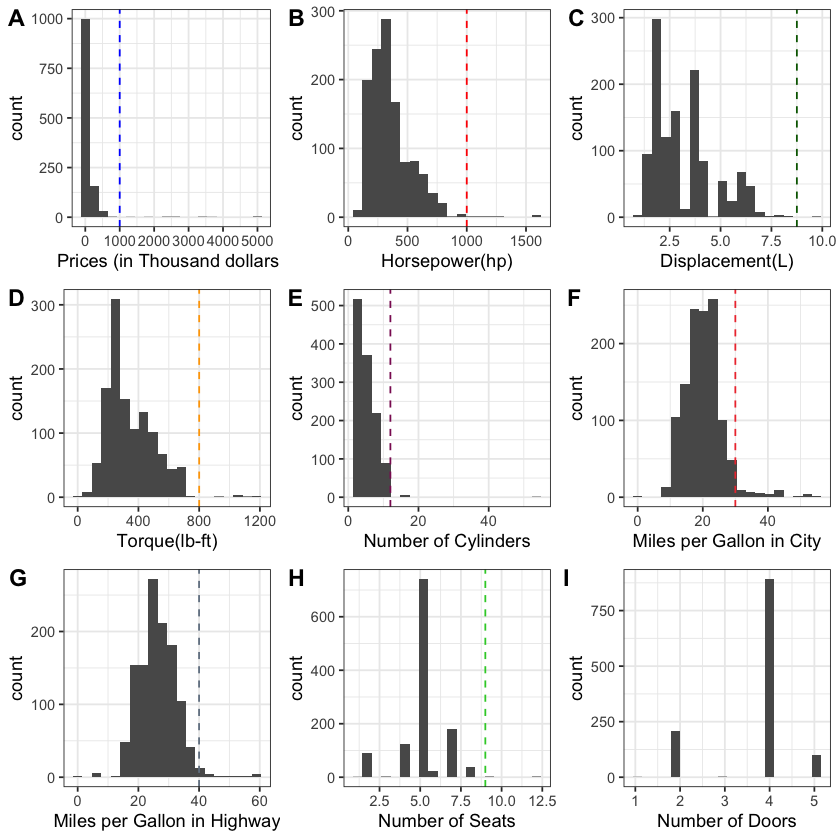

In [24]:
library(repr) # Resizing Graph
# 1.1 Price
price_his <-ggplot(cars_us2022, aes(x=Price/1000))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 1000, color = "blue", linetype="dashed") + theme_bw() +
  labs(x = "Prices (in Thousand dollars)")
# Big difference between price min and max creates: histogram does not represent overall data
# Price under or equal to 1000,000 dollars are where the most data points are. 

# 1.2 Horsepower (Power.hp)
power_his <- ggplot(cars_us2022, aes(x=Power.hp))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 1000, color = "red", linetype="dashed") + theme_bw() +
  labs(x = "Horsepower(hp)")
# There was big differences between 3rd quartile/mean and Maximum values. 
# Horsepower less than 1000 are where the most data points are. 

# 1.3 Displacement (Displacement.l)
disp_his <- ggplot(cars_us2022, aes(x=Displacement.l))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 8.75, color = "darkgreen", linetype="dashed") + 
  theme_bw() + labs(x = "Displacement(L)")
# The differences between mean to max shows that there are outliers 
# as min, 1st quartile, median, mean and 3rd quartile are all close together  
# except max.  

# 1.4 Torque (Torque.lbft)
torque_his <- ggplot(cars_us2022, aes(x=Torque.lbft))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 800, color = "orange", linetype="dashed") + 
  theme_bw() + labs(x = "Torque(lb-ft)")
# The differences between mean to max shows that there are outliers 
# as min, 1st quartile, median, mean and 3rd quartile are all close together  
# except max.  

# 1.5 Cylinders
cylinder_his <- ggplot(cars_us2022, aes(x=Cylinders))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 12, color = "maroon4", linetype="dashed") +
  theme_bw() + labs(x = "Number of Cylinders")
# The differences between mean to max shows that there are outliers 
# as min, 1st quartile, median, mean and 3rd quartile are all close together  
# except max.  

# 1.6 MPG.City
mpgC_his <- ggplot(cars_us2022, aes(x=MPG.City))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 30, color = "brown2", linetype="dashed") +
  theme_bw() + labs(x = "Miles per Gallon in City")

# 1.7 MPG.Highway
mpgH_his <- ggplot(cars_us2022, aes(x=MPG.Highway))+geom_histogram(bins = 20) +
  geom_vline(xintercept = 40, color = "slategray", linetype="dashed") +
  theme_bw() + labs(x = "Miles per Gallon in Highway")

# 1.8 Seats
seat_his <- ggplot(cars_us2022, aes(x=Seats))+geom_histogram(bins = 20) + 
  geom_vline(xintercept = 9, color = "limegreen", linetype="dashed") +
  theme_bw() + labs(x = "Number of Seats")

# 1.9 Doors
door_his <- ggplot(cars_us2022, aes(x=Doors))+geom_histogram(bins = 20) + 
  theme_bw() + labs(x = "Number of Doors")

# Total
his_raw <- ggarrange(price_his, power_his, disp_his, torque_his, cylinder_his, mpgC_his,
                     mpgH_his, seat_his, door_his,
                     labels = c("A", "B", "C", "D", "E", "F","G","H","I"),
                     ncol = 3, nrow = 3)
his_raw 

**Price:** Noticeable disparities are evident between the minimum and maximum values, indicating that the histogram does not provide a comprehensive depiction of the entire dataset. The majority of data points are concentrated within the price range of up to 1,000,000 dollars.

**Horsepower:** Substantial differences between the 3rd quartile/mean and the maximum values. The majority of data points fall within the range of horsepower less than 1000 hp.

**Displacement, Torque and Number of Cylinders:** Noteworthy differences are evident between the mean and maximum values, indicating the presence of outliers near the upper limit. The minimum, 1st quartile, median, mean, and 3rd quartile exhibit close proximity, contrasting with the maximum value.

2. Filter the Data by removing Outliers

In [25]:
cars_us2022_filter <- cars_us2022 %>% filter(Price<= 100000) %>%
  filter(Power.hp <=1000) %>% 
  filter(Displacement.l <=8.75) %>%
  filter(Torque.lbft <=800) %>%
  filter(Cylinders <= 12) %>%
  filter(MPG.City <=30) %>%
  filter(MPG.Highway <=40) %>%
  filter(Seats <9)

# 905 observations and 14 variables
cars_us2022_filter$Price1000 <- cars_us2022_filter$Price/1000 
str(cars_us2022_filter) # 905 observations and 15 variables

'data.frame':	905 obs. of  15 variables:
 $ Brand         : chr  "Acura" "Acura" "Acura" "Acura" ...
 $ Price         : num  35800 32800 30800 30800 35800 ...
 $ Body.Type     : chr  "Hatchback" "Hatchback" "Hatchback" "Hatchback" ...
 $ Fuel.Type     : chr  "Petrol" "Petrol" "Petrol" "Petrol" ...
 $ Gearbox.Type  : chr  "CVT" "CVT" "CVT" "CVT" ...
 $ Power.hp      : int  200 200 200 200 200 290 290 290 272 290 ...
 $ Displacement.l: num  1.5 1.5 1.5 1.5 1.5 3.5 3.5 3.5 2 3.5 ...
 $ Torque.lbft   : int  192 192 192 192 192 267 267 267 280 267 ...
 $ Cylinders     : int  4 4 4 4 4 6 6 6 4 6 ...
 $ Drivetrain    : chr  "front" "front" "front" "front" ...
 $ MPG.City      : int  29 29 30 30 26 19 19 19 21 19 ...
 $ MPG.Highway   : int  36 36 37 37 36 26 25 26 26 25 ...
 $ Seats         : int  5 5 5 5 5 7 7 7 5 7 ...
 $ Doors         : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Price1000     : num  35.8 32.8 30.8 30.8 35.8 ...
 - attr(*, "na.action")= 'omit' Named int [1:1373] 6 8 17 19 20 23 25 26 2

#### Distribution of Car Specifications (Data Visualization after Filtering)

##### 1.Histogram

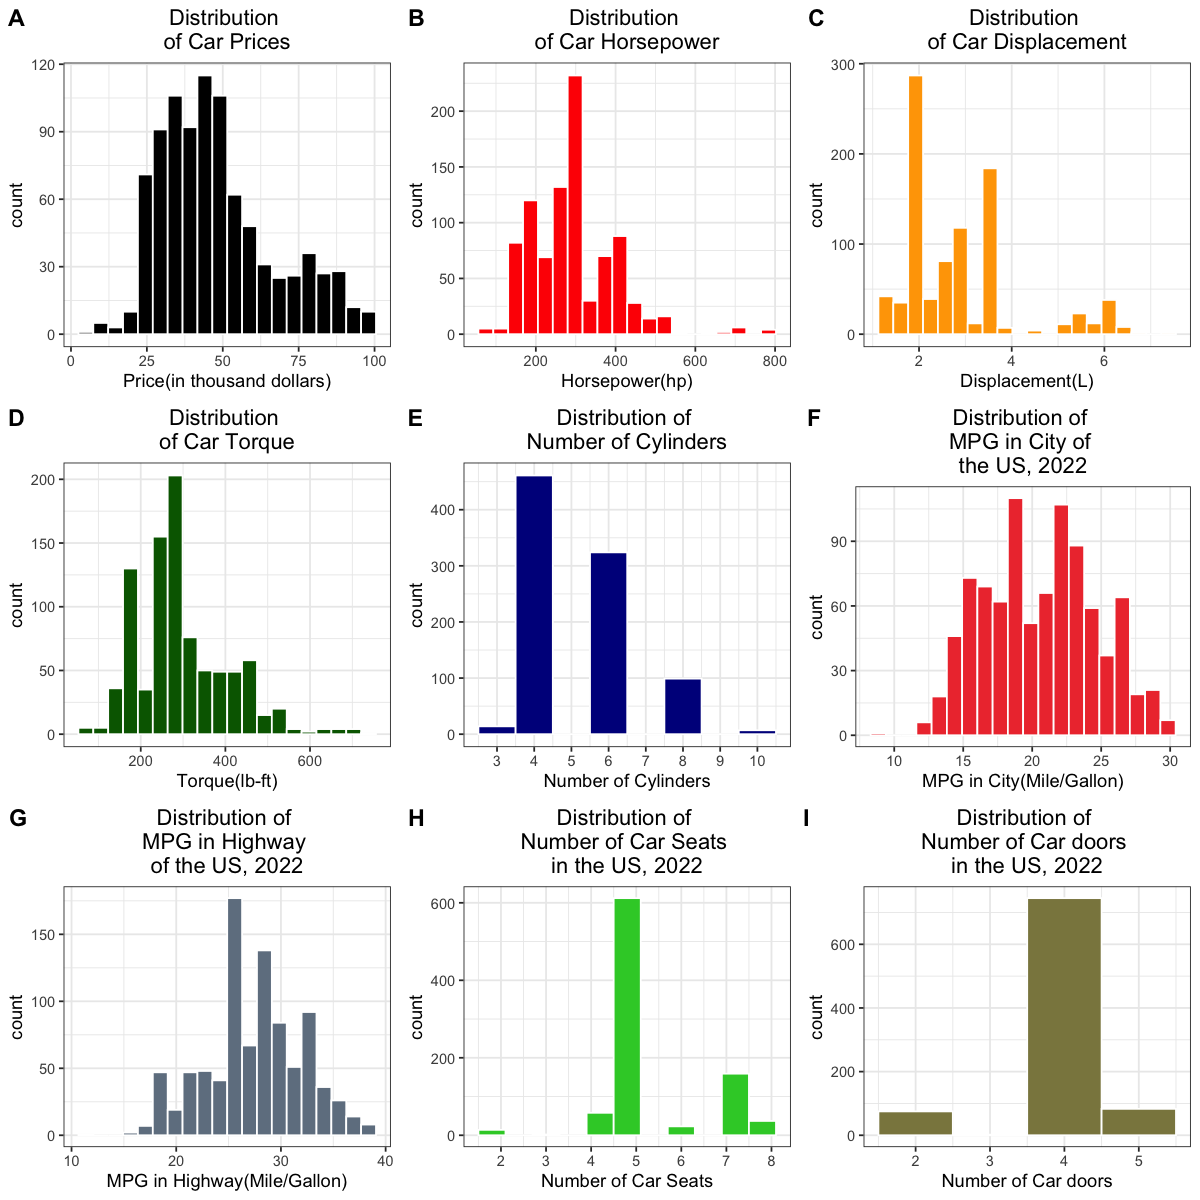

In [38]:
# 1.1 Price
price_his1 <- ggplot(cars_us2022_filter, aes(x=Price1000)) + 
  geom_histogram(color="white", fill="black", bins = 20) + theme_bw() +
  ggtitle("Distribution \nof Car Prices") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Price(in thousand dollars)")

# 1.2 Horsepower (Power.hp)
power_his1 <- ggplot(cars_us2022_filter, aes(x=Power.hp)) + 
  geom_histogram(color="white", fill="red", bins = 20) + theme_bw() +
  ggtitle("Distribution \nof Car Horsepower") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Horsepower(hp)") 

# 1.3 Displacement(Displacement.l)
disp_his1 <- ggplot(cars_us2022_filter, aes(x=Displacement.l)) + 
  geom_histogram(color="white", fill="orange", bins = 20) + theme_bw() +
  ggtitle("Distribution \nof Car Displacement") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Displacement(L)")

# 1.4 Torque (Torque.lbft)
torque_his1 <- ggplot(cars_us2022_filter, aes(x=Torque.lbft)) + 
  geom_histogram(color="white", fill="darkgreen", bins = 20) + theme_bw() +
  ggtitle("Distribution \nof Car Torque") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Torque(lb-ft)")

# 1.5 Cylinders (Cylinders)
cylinder_his1 <- ggplot(cars_us2022_filter, aes(x=Cylinders)) + 
  geom_histogram(color="white", fill="darkblue", bins = 8) + 
  scale_x_continuous(breaks=3:10) +
  theme_bw() +
  ggtitle("Distribution of \nNumber of Cylinders") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Number of Cylinders")

# 1.6 MPG in City (MPG.City)
mpgC_his1 <- ggplot(cars_us2022_filter, aes(x=MPG.City)) + 
  geom_histogram(color="white", fill="brown2", bins =  20) + 
  theme_bw() +
  ggtitle("Distribution of \nMPG in City of \nthe US, 2022") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "MPG in City(Mile/Gallon)")

# 1.7 MPG in Highway (MPG.Highway)
mpgH_his1 <- ggplot(cars_us2022_filter, aes(x=MPG.Highway)) + 
  geom_histogram(color="white", fill="slategray", bins =  20) + 
  theme_bw() +
  ggtitle("Distribution of \nMPG in Highway \nof the US, 2022") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "MPG in Highway(Mile/Gallon)")

# 1.8 Seats
seats_his1 <- ggplot(cars_us2022_filter, aes(x=Seats)) + 
  geom_histogram(color="white", fill="limegreen", bins =  11) + 
  theme_bw() + scale_x_continuous(breaks=2:12) + 
  ggtitle("Distribution of \nNumber of Car Seats \nin the US, 2022") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Number of Car Seats")

# 1.9 Doors
doors_his1 <- ggplot(cars_us2022_filter, aes(x=Doors)) + 
  geom_histogram(color="white", fill="khaki4", bins =  4) + 
  theme_bw() + scale_x_continuous(breaks=2:5) + 
  ggtitle("Distribution of \nNumber of Car doors \nin the US, 2022") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Number of Car doors")

options(repr.plot.width=10, repr.plot.height=10)
# Put all histograms in a one plot
his_new <- ggarrange(price_his1, power_his1, disp_his1, torque_his1, cylinder_his1,
                     mpgC_his1, mpgH_his1, seats_his1, doors_his1, 
                     labels = c("A", "B", "C", "D", "E", "F","G","H","I"),
                     ncol = 3, nrow = 3)
his_new

##### 2. Boxplots

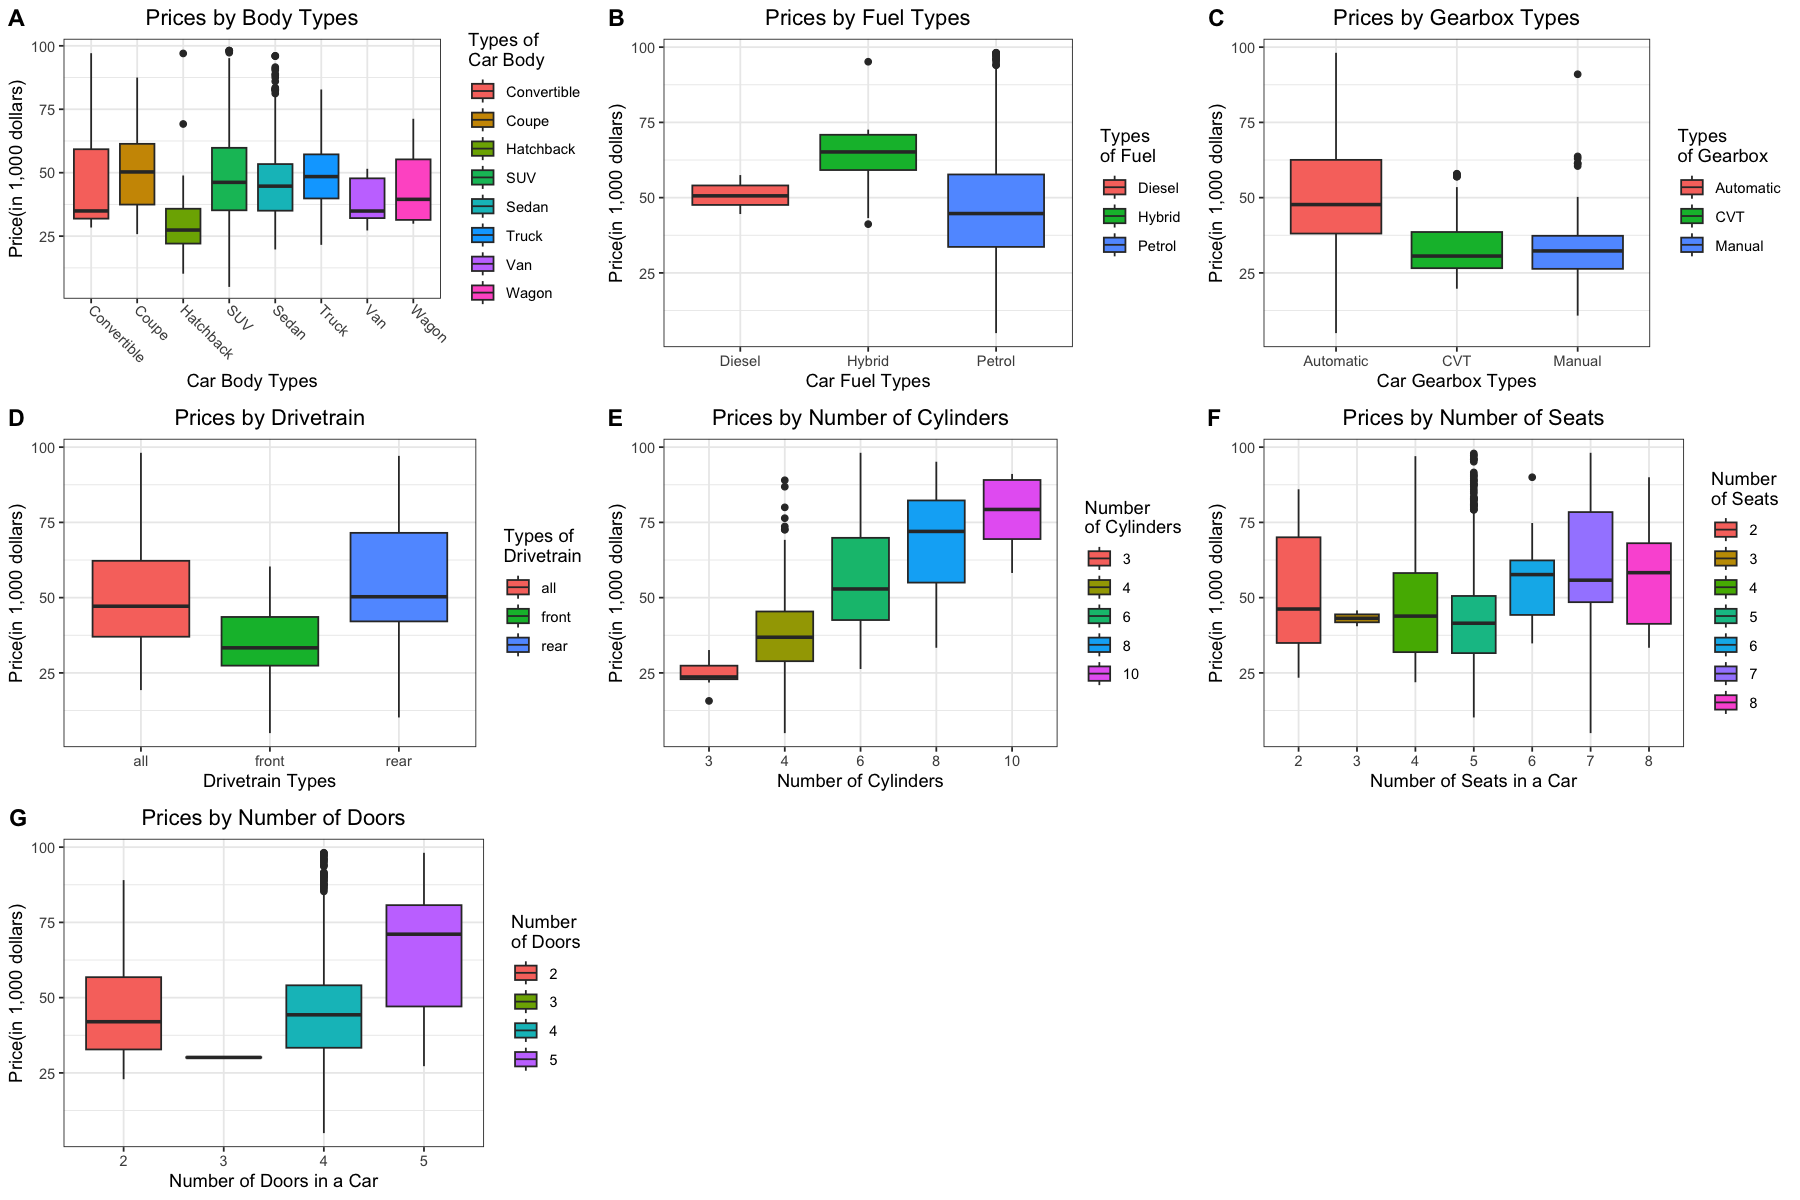

In [39]:
## 2.1 Cars Price Distribution based on Body.Type using a boxplot
price_body_box <- ggplot(cars_us2022_filter, aes(x=Body.Type, y = Price1000, fill = Body.Type)) + 
  geom_boxplot() + theme_bw() +
  ggtitle("Prices by Body Types") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  theme(axis.text.x = element_text(angle = -45, vjust = 0.5, hjust=0)) +
  labs(x = "Car Body Types", y = "Price(in 1,000 dollars)", fill = "Types of \nCar Body")


## 2.2 Cars Price Distribution based on Fuel.Type using a boxplot
price_fuel_box <- ggplot(cars_us2022_filter, aes(x=Fuel.Type, y = Price1000, fill = Fuel.Type)) + 
  geom_boxplot() + theme_bw() +
  ggtitle("Prices by Fuel Types") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Car Fuel Types", y = "Price(in 1,000 dollars)", fill = "Types \nof Fuel")
 
# Except the outlier, Diesel is the most expansive car fuel type (median)
# Hybrid and Petrol have wider range in prices

## 2.3 Cars Price Distribution based on Gearbox.Type using a boxplot
price_gearbox_box <- ggplot(cars_us2022_filter, aes(x=Gearbox.Type, y = Price1000, fill = Gearbox.Type)) + 
  geom_boxplot() + theme_bw() +
  ggtitle("Prices by Gearbox Types") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Car Gearbox Types", y = "Price(in 1,000 dollars)", fill = "Types \nof Gearbox")
 # Except the outlier, car that has automatic gearbox is the most expansive

## 2.4 Cars Price Distribution based on Drivetrain using a boxplot
price_drivetrain_box <- ggplot(cars_us2022_filter, aes(x=Drivetrain, y = Price1000, fill = Drivetrain)) + 
  geom_boxplot() + theme_bw() +
  ggtitle("Prices by Drivetrain") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Drivetrain Types", y = "Price(in 1,000 dollars)", 
       fill = "Types of \nDrivetrain")
 
# the price of car that has All(front and rear) for drivetrain types are 
# between the front drivetrain and rear drivetrain

## 2.5 Cars Price Distribution based on Number of Cylinder using a boxplot
price_cylinder_box <- ggplot(cars_us2022_filter, aes(x=factor(Cylinders), y = Price1000, fill = factor(Cylinders))) + 
  geom_boxplot() + theme_bw() + 
  ggtitle("Prices by Number of Cylinders") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Number of Cylinders", y = "Price(in 1,000 dollars)", 
       fill = "Number \nof Cylinders")
 # Except the outlier, more cylinders are, more expansive the car price is

## 2.6 Cars Price Distribution based on Number of Seats using a boxplot
price_seat_box <- ggplot(cars_us2022_filter, aes(x=factor(Seats), y = Price1000, fill = factor(Seats))) + 
  geom_boxplot() + theme_bw() + 
  ggtitle("Prices by Number of Seats") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Number of Seats in a Car", y = "Price(in 1,000 dollars)", 
       fill = "Number \nof Seats")
# Number of seats is not the major factor affecting car price

## 2.7 Cars Price Distribution based on Number of Doors using a boxplot
price_door_box <- ggplot(cars_us2022_filter, aes(x=factor(Doors), y = Price1000, fill = factor(Doors))) + 
  geom_boxplot() + theme_bw() + 
  ggtitle("Prices by Number of Doors") +
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Number of Doors in a Car", y = "Price(in 1,000 dollars)", 
       fill = "Number \nof Doors")
# It seems like more number of car doors are more expansive but
# Number of doors is not the major factor affecting car price


options(repr.plot.width=15, repr.plot.height=10)
# Put all histograms in a one plot
box_price <- ggarrange(price_body_box, price_fuel_box, price_gearbox_box, 
                       price_drivetrain_box, price_cylinder_box,
                       price_seat_box,price_door_box,
                     labels = c("A", "B", "C", "D", "E","F","G"),
                     ncol = 3, nrow = 3)
box_price

##### 3. Barplots

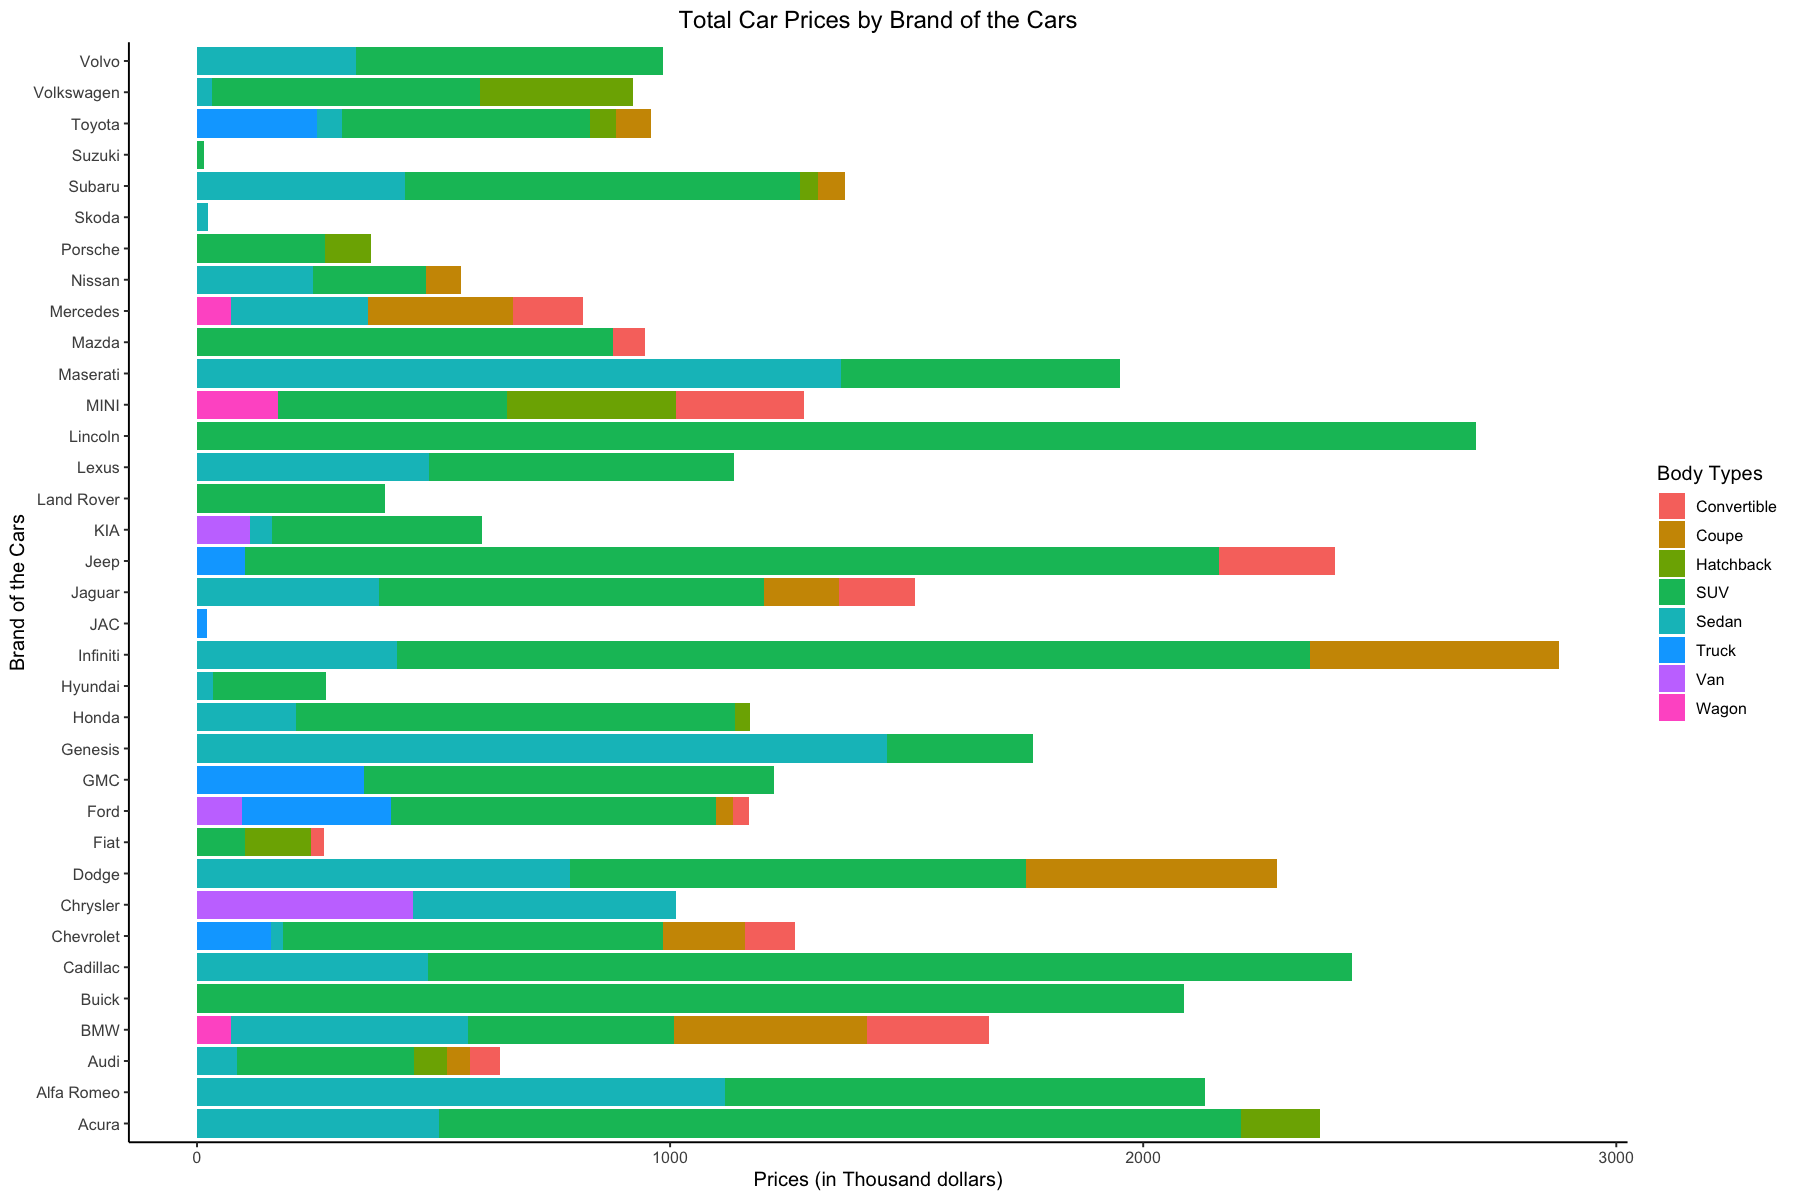

In [40]:
## 3.1 Total Car Price vs Brand (Group by: Body.Type)
price_brand_bar <- ggplot(cars_us2022_filter, aes(x=Brand, y = Price1000, fill = Body.Type)) + 
  geom_bar(stat="identity") + coord_flip() +theme_classic2() +
  ggtitle("Total Car Prices by Brand of the Cars") + 
  theme(plot.title = element_text(hjust = 0.5)) + 
  labs(x = "Brand of the Cars", y = "Prices (in Thousand dollars)", 
       fill = "Body Types")
price_brand_bar # SUV is the most widespread body types in the market

##### 4. Pie Charts

In [45]:
cars_char <- cars_us2022_filter
cars_char$Cylinders <- as.character(cars_char$Cylinders)
cars_char <- cars_char %>% select_if(is.character)
str(cars_char)

'data.frame':	905 obs. of  6 variables:
 $ Brand       : chr  "Acura" "Acura" "Acura" "Acura" ...
 $ Body.Type   : chr  "Hatchback" "Hatchback" "Hatchback" "Hatchback" ...
 $ Fuel.Type   : chr  "Petrol" "Petrol" "Petrol" "Petrol" ...
 $ Gearbox.Type: chr  "CVT" "CVT" "CVT" "CVT" ...
 $ Cylinders   : chr  "4" "4" "4" "4" ...
 $ Drivetrain  : chr  "front" "front" "front" "front" ...
 - attr(*, "na.action")= 'omit' Named int [1:1373] 6 8 17 19 20 23 25 26 27 28 ...
  ..- attr(*, "names")= chr [1:1373] "6" "8" "17" "19" ...


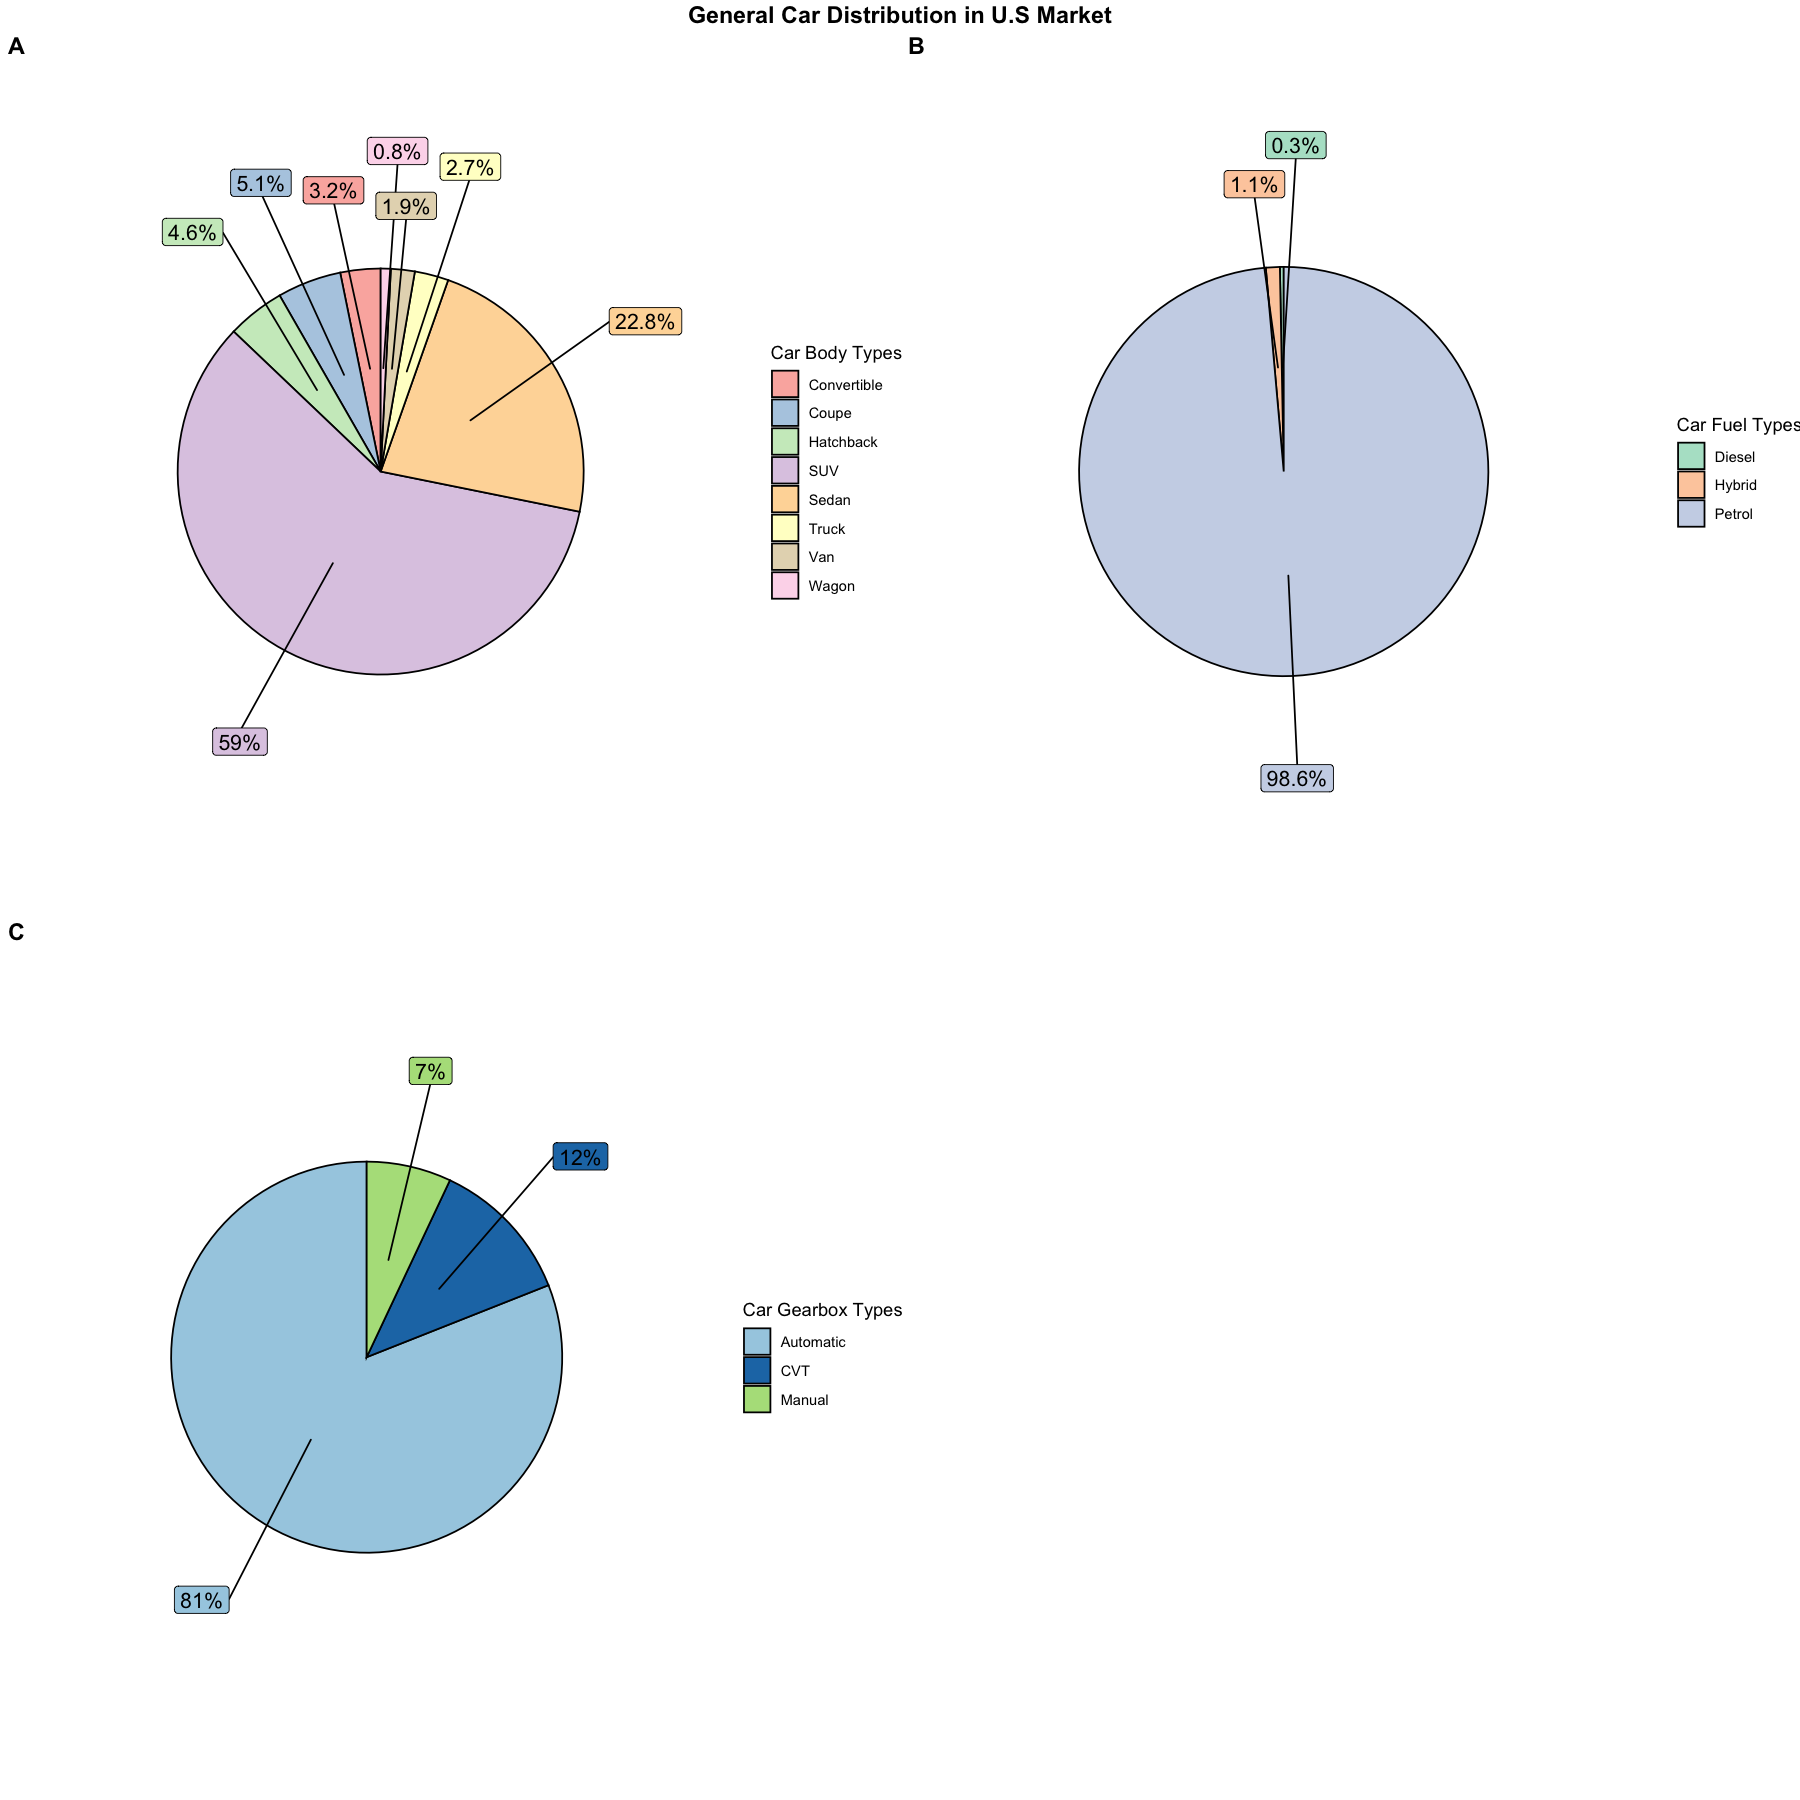

In [48]:
## 4.1 Distribution of Car Body types in the dataset
cars_bodytable <- data.frame(table(cars_char$Body.Type))
colnames(cars_bodytable) <-c("Body.Type","Freq")

#Calculate Percentage for Pie Chart
cars_bodytable$piepercent<- round(100*cars_bodytable$Freq/sum(cars_bodytable$Freq), 1)

#Pie Chart for Car Body types
# Get the positions
bodytable <- cars_bodytable %>% 
  mutate(csum = rev(cumsum(rev(piepercent))), 
         pos = piepercent/2 + lead(csum, 1),
         pos = if_else(is.na(pos), piepercent/2, pos))

pbody_pie<- ggplot(cars_bodytable, aes(x="", y=piepercent, fill=c(Body.Type))) +
  geom_col(width = 1, color = 1) +
  coord_polar(theta ="y", start=0) + 
  scale_fill_brewer(palette = "Pastel1") + 
  geom_label_repel(data = bodytable,
                   aes(y = pos, label = paste0(piepercent, "%")),
                   size = 4.5, nudge_x = 1, show.legend = FALSE) + 
  guides(fill = guide_legend(title = "Car Body Types")) +
  theme_void()

## 4.2 Distribution of Car Fuel types in the dataset
cars_fueltable <- data.frame(table(cars_char$Fuel.Type))
colnames(cars_fueltable) <-c("Fuel.Type","Freq")

#Calculate Percentage for Pie Chart
cars_fueltable$piepercent<- round(100*cars_fueltable$Freq/sum(cars_fueltable$Freq), 1)

#Pie Chart for Car Fuel types
# Get the positions
fueltable <- cars_fueltable %>% 
  mutate(csum = rev(cumsum(rev(piepercent))), 
         pos = piepercent/2 + lead(csum, 1),
         pos = if_else(is.na(pos), piepercent/2, pos))

pfuel_pie<- ggplot(cars_fueltable, aes(x="", y=piepercent, fill=c(Fuel.Type))) +
  geom_col(width = 1, color = 1) +
  coord_polar(theta ="y", start=0) + 
  scale_fill_brewer(palette = "Pastel2") + 
  geom_label_repel(data = fueltable,
                   aes(y = pos, label = paste0(piepercent, "%")),
                   size = 4.5, nudge_x = 1, show.legend = FALSE) + 
  guides(fill = guide_legend(title = "Car Fuel Types")) +
  theme_void()

## 4.3 Distribution of Car Gearbox types in the dataset
cars_gearboxtable <- data.frame(table(cars_char$Gearbox.Type))
colnames(cars_gearboxtable) <-c("Gearbox.Type","Freq")

#Calculate Percentage for Pie Chart
cars_gearboxtable$piepercent<- round(100*cars_gearboxtable$Freq/sum(cars_gearboxtable$Freq), 1)

#Pie Chart for Car Gearbox types
# Get the positions
gearboxtable <- cars_gearboxtable %>% 
  mutate(csum = rev(cumsum(rev(piepercent))), 
         pos = piepercent/2 + lead(csum, 1),
         pos = if_else(is.na(pos), piepercent/2, pos))

pgearbox_pie<- ggplot(cars_gearboxtable, aes(x="", y=piepercent, fill=c(Gearbox.Type))) +
  geom_col(width = 1, color = 1) +
  coord_polar(theta ="y", start=0) + 
  scale_fill_brewer(palette = "Paired") + 
  geom_label_repel(data = gearboxtable,
                   aes(y = pos, label = paste0(piepercent, "%")),
                   size = 4.5, nudge_x = 1, show.legend = FALSE) + 
  guides(fill = guide_legend(title = "Car Gearbox Types")) +
  theme_void()

# Total Pie Charts in one figure
options(repr.plot.width=15, repr.plot.height=15)
pie_all <- ggarrange(pbody_pie, pfuel_pie, pgearbox_pie,
                     labels = c("A", "B", "C"),
                     ncol = 2, nrow = 2)
pie_all <- annotate_figure(pie_all, top = text_grob("General Car Distribution in U.S Market", 
                                      color = "black", face = "bold", size = 14))

pie_all

##### 5. Correlation Matrix

,Price,Power.hp,Displacement.l,Torque.lbft,Cylinders,MPG.City,MPG.Highway,Seats,Doors
Price,1.00,0.77,0.54,0.80,0.62,-0.66,-0.64,0.28,0.15
Power.hp,0.77,1.00,0.71,0.95,0.73,-0.75,-0.64,0.21,0.05
Displacement.l,0.54,0.71,1.00,0.65,0.87,-0.73,-0.65,0.33,0.09
Torque.lbft,0.80,0.95,0.65,1.00,0.66,-0.72,-0.66,0.23,0.10
Cylinders,0.62,0.73,0.87,0.66,1.00,-0.74,-0.66,0.36,0.11
MPG.City,-0.66,-0.75,-0.73,-0.72,-0.74,1.00,0.90,-0.40,-0.15
MPG.Highway,-0.64,-0.64,-0.65,-0.66,-0.66,0.90,1.00,-0.44,-0.22
Seats,0.28,0.21,0.33,0.23,0.36,-0.40,-0.44,1.00,0.66
Doors,0.15,0.05,0.09,0.10,0.11,-0.15,-0.22,0.66,1.00


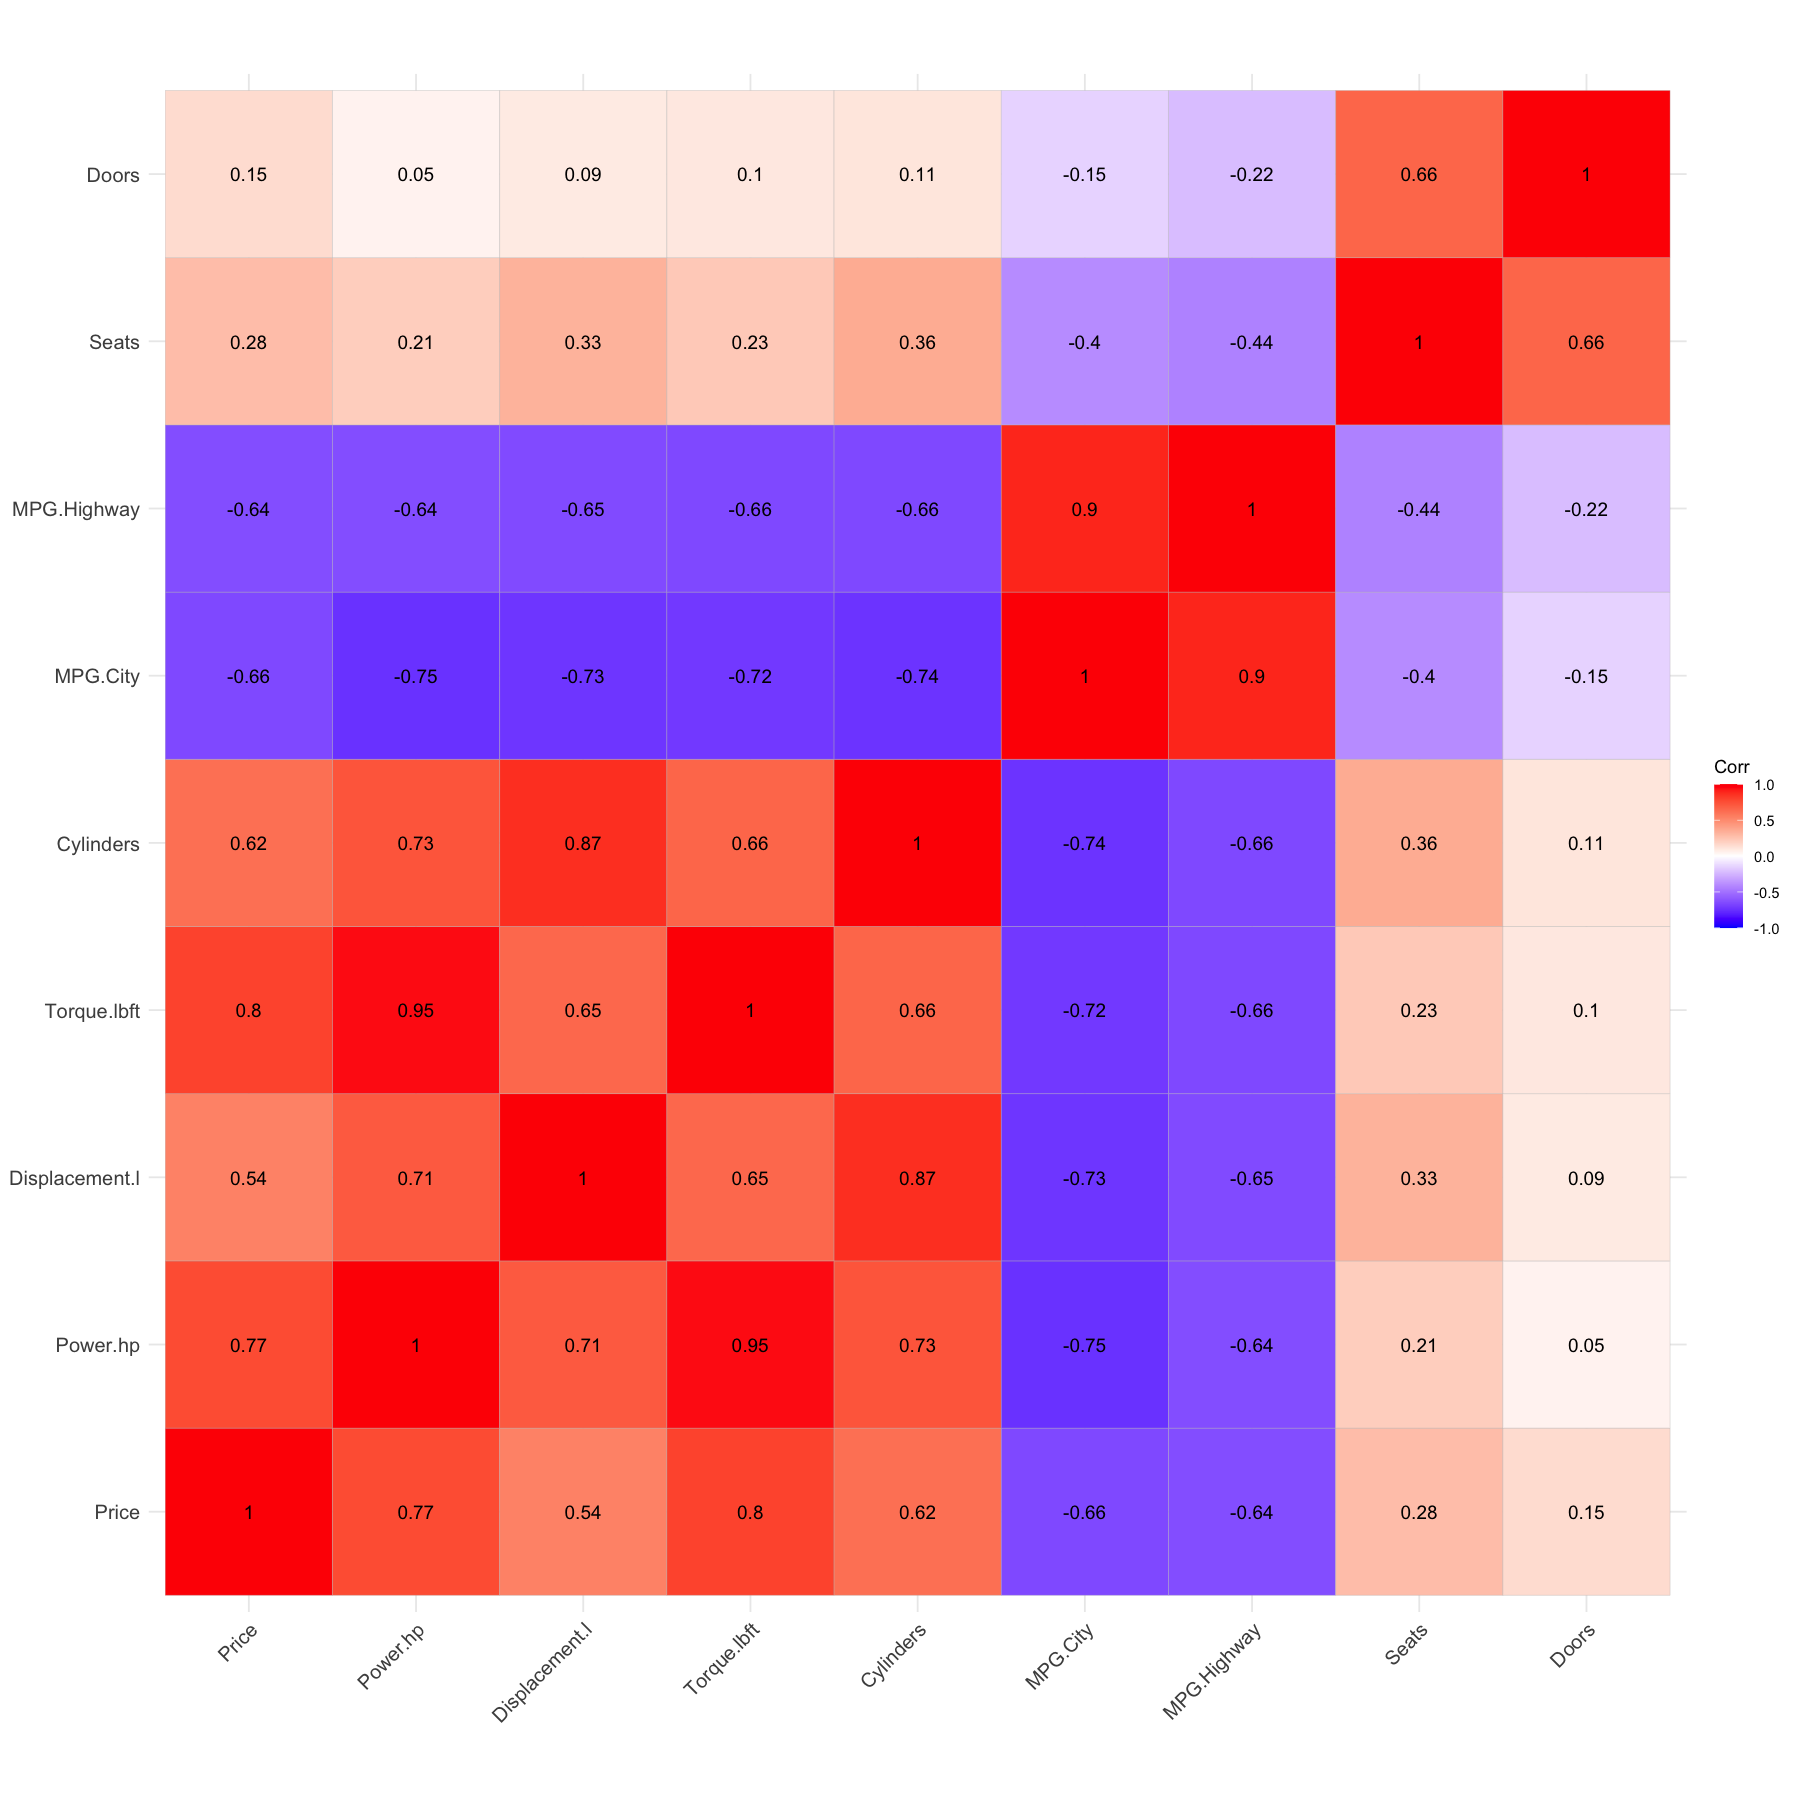

In [49]:
### 5.1 Numerical Variable Relationship in the dataframe
cars_num <- cars_us2022_filter %>% select_if(is.numeric) %>% 
  select(!c("Price1000")) # 1214 observations of 9 variables
cars_matrix <- round(cor(cars_num), 2) # put into a matrix with two decimal
cars_matrix
ggcorrplot(cars_matrix, method = "square", lab = TRUE)

### References:
[1] Terrell Croft, Wilford Summers, American Electrician's Handbook Eleventh Edition, McGraw Hill, 1987,ISBN 0-07-013932-6, page 7-175